In [43]:
import torch
from seq2seq.tools.inference import CaptionGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.misc import imresize

In [155]:

cuda = False
checkpoint = torch.load('../results/captions_no_finetune/checkpoint1.pth.tar')
model = checkpoint['model']
img_transform, target_tok = checkpoint['tokenizers'].values()

caption_model = CaptionGenerator(model,
                               img_transform=img_transform(allow_var_size=True, train=False),
                               target_tok=target_tok,
                               beam_size=5,
                               get_attention=True,
                               length_normalization_factor=0.,
                               cuda=cuda)

def show_and_tell(filename):
    img = Image.open(filename, 'r')
    
    %matplotlib inline
    plt.figure()
    plt.imshow(np.asarray(img))

    
    return img, caption_model.describe(img)

def visualize_attention(img, attention):
    img = np.asarray(img)
    H, W = img.shape[1], img.shape[0]
    attention, preds = attention
    H, W = size
    fig, plots = plt.subplots(len(preds), 1, figsize=(100, 40))
    for i, p in enumerate(preds):
        resized_attention = imresize(attention[i].cpu().numpy(), (H,W))
     
        plots[i].set_title(p)
        plots[i].imshow(resized_attention)
    plt.tight_layout()
    plt.show()

A large clock tower in the middle of the water.


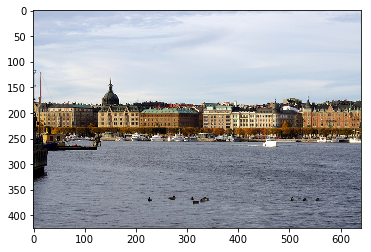

In [158]:
img, (caption, attentions) = show_and_tell('/media/ssd/Datasets/COCO/val2014/COCO_val2014_000000200089.jpg')
print(caption)

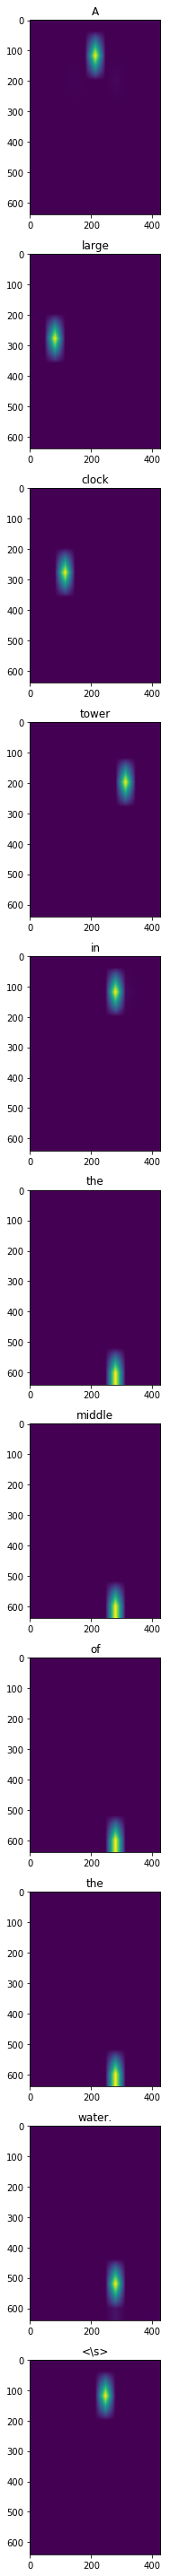

In [159]:
visualize_attention(img, attentions)